In [13]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:

df = pd.read_csv("/Users/admin/Desktop/UNI/Y3/BT4012/Project/BT4012_Reviews/Data/Raw/Entity_Count_Flag_dataframe.csv")

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_9144/1874977924.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/admin/Desktop/UNI/Y3/BT4012/Project/BT4012_Reviews/Data/Raw/Entity_Count_Flag_dataframe.csv")


In [4]:
df.head()

,reviewDate,reviewID,reviewerID,reviewContent,reviewRating,reviewUsefulCount,reviewCoolCount,reviewFunnyCount,restaurantID,flagged,...,NRP_count,LOCATION_count,PERSON_count,PHONE_NUMBER_count,DATE_TIME_flag,EMAIL_ADDRESS_flag,NRP_flag,LOCATION_flag,PERSON_flag,PHONE_NUMBER_flag
0,9/22/2012,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,pbEiXam9YJL3neCYHGwLUA,N,...,1,0,4,0,True,False,True,False,True,False
1,9/22/2012,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,Probably one of the best meals I've had ever. ...,5,0,0,0,pbEiXam9YJL3neCYHGwLUA,N,...,0,0,1,0,True,False,False,False,True,False
2,9/19/2012,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,Service was impeccable. Experience and present...,3,2,0,0,pbEiXam9YJL3neCYHGwLUA,N,...,0,0,0,0,False,False,False,False,False,False
3,9/6/2012,iSN,DlwexC7z88ymAzu45skODw,"The problem with places like this, given the e...",3,8,0,3,pbEiXam9YJL3neCYHGwLUA,N,...,0,0,2,0,True,False,False,False,True,False
4,9/9/2012,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,I have no idea how to write my review - dining...,5,1,2,0,pbEiXam9YJL3neCYHGwLUA,N,...,1,1,0,0,True,False,True,True,False,False


## Basic Statistics 

### Check for Null Values in Columns

In [5]:
# finding the number of null/blank values for all columns in all cols 
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(f' "{col}" : {df[col].isna().sum()}')
    else:
        continue


 "reviewID" : 1
 "reviewerLocation" : 9
 "DATE_TIME" : 13641
 "EMAIL_ADDRESS" : 26955
 "NRP" : 21593
 "LOCATION" : 19120
 "PERSON" : 23195
 "PHONE_NUMBER" : 26954


### Split Columns into Categorical and Numerical Columns

In [11]:
numerical_columns = []
cat_columns = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numerical_columns.append(column)
    else:
        cat_columns.append(column)
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", cat_columns)


Numerical Columns: ['reviewRating', 'reviewUsefulCount', 'reviewCoolCount', 'reviewFunnyCount', 'reviewerFriendCount', 'reviewerNumReviews', 'reviewerFirstCount', 'reviewerUsefulCount', 'reviewerCoolCount', 'reviewerFunnyCount', 'reviewerComplimentCount', 'reviewerTipCount', 'reviewerFanCount', 'resReviewCount', 'resRating', 'DATE_TIME_count', 'EMAIL_ADDRESS_count', 'NRP_count', 'LOCATION_count', 'PERSON_count', 'PHONE_NUMBER_count']
Categorical Columns: ['reviewDate', 'reviewID', 'reviewerID', 'reviewContent', 'restaurantID', 'flagged', 'reviewerName', 'reviewerLocation', 'reviewerYelpJoinDate', 'resLocation', 'resName', 'DATE_TIME', 'EMAIL_ADDRESS', 'NRP', 'LOCATION', 'PERSON', 'PHONE_NUMBER', 'DATE_TIME_flag', 'EMAIL_ADDRESS_flag', 'NRP_flag', 'LOCATION_flag', 'PERSON_flag', 'PHONE_NUMBER_flag']


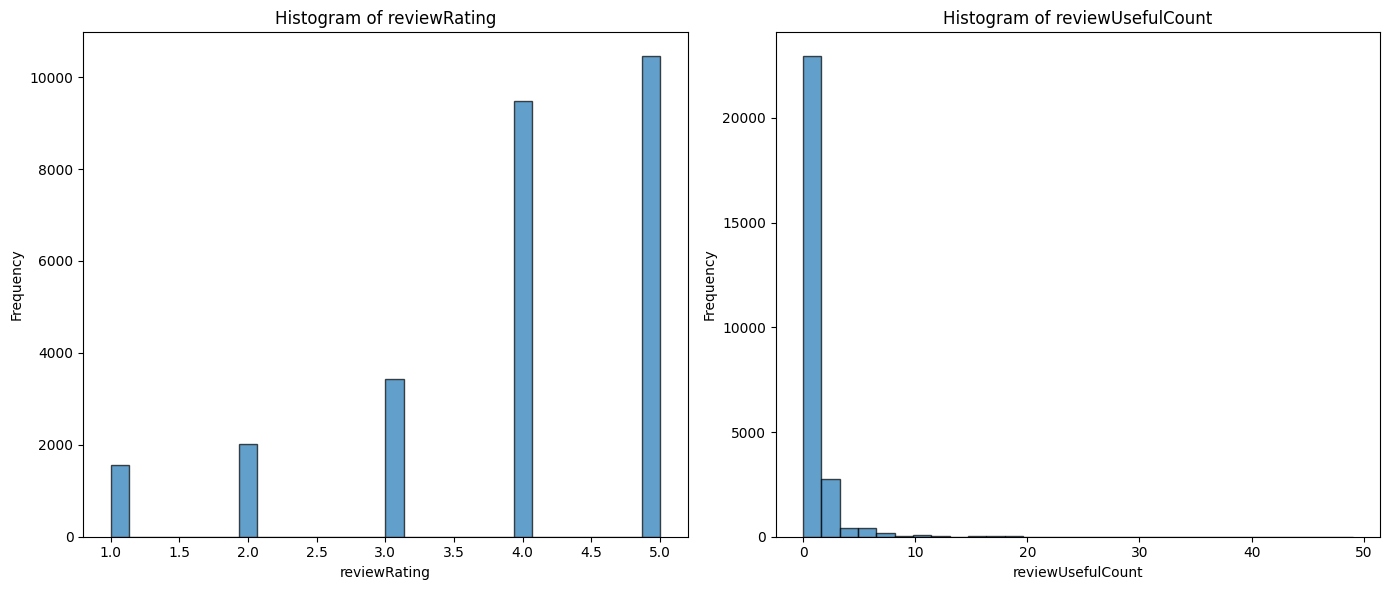

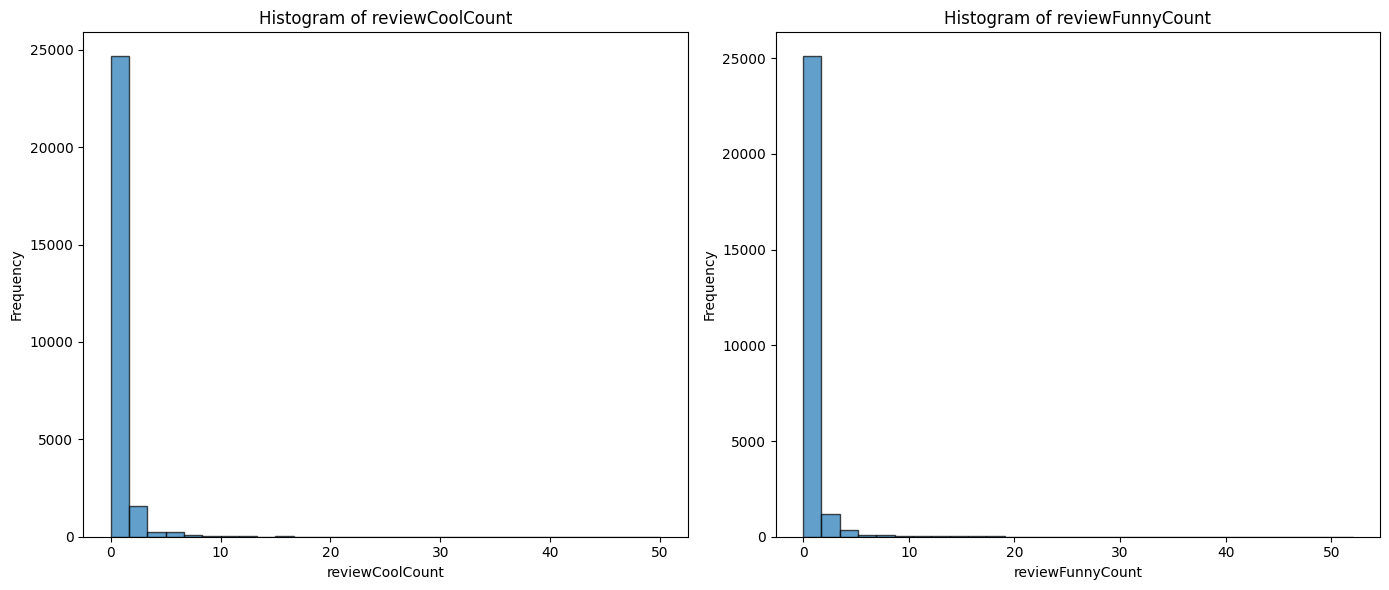

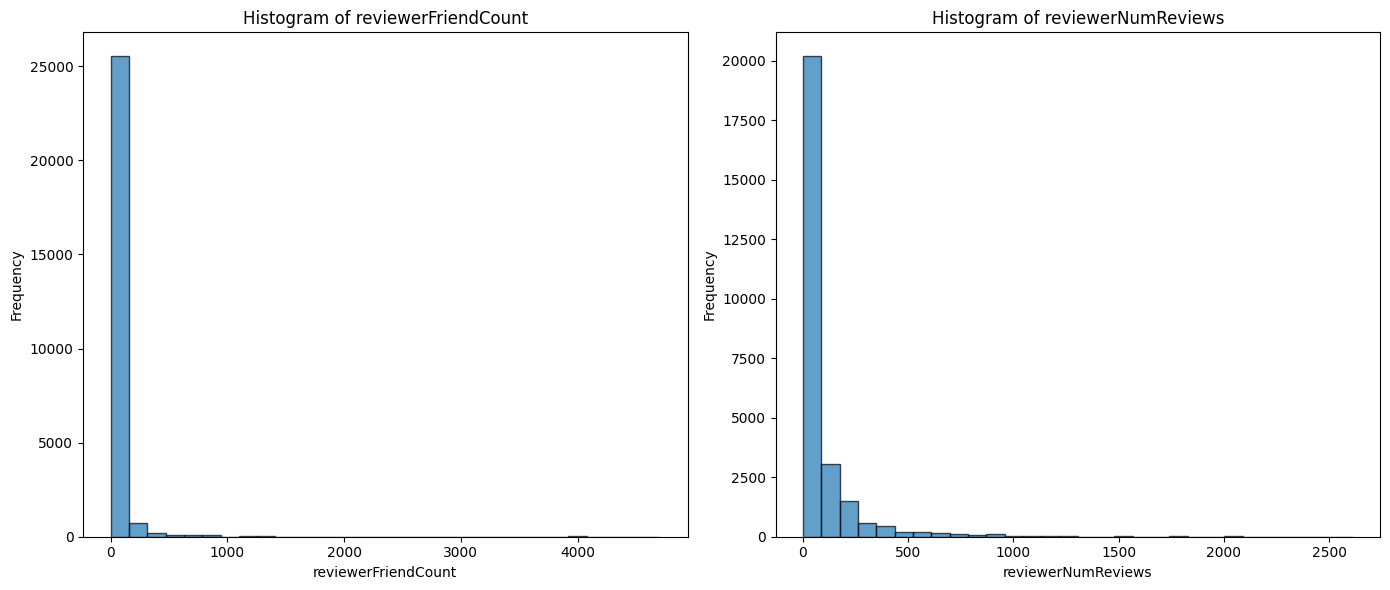

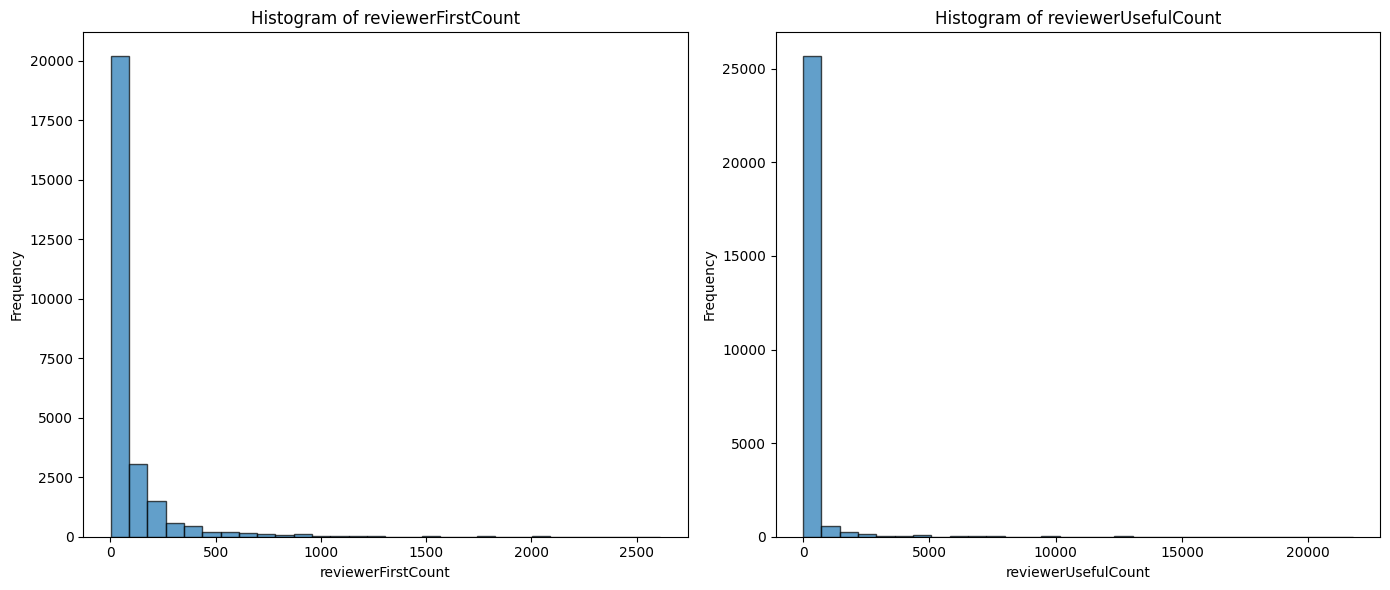

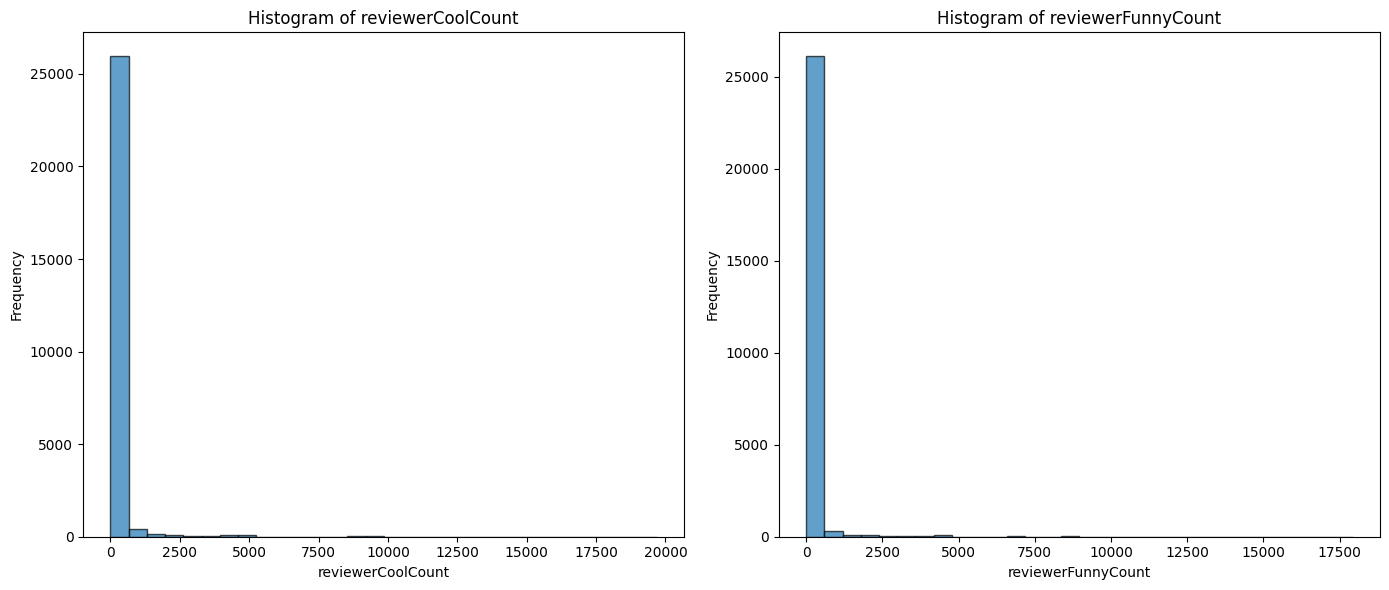

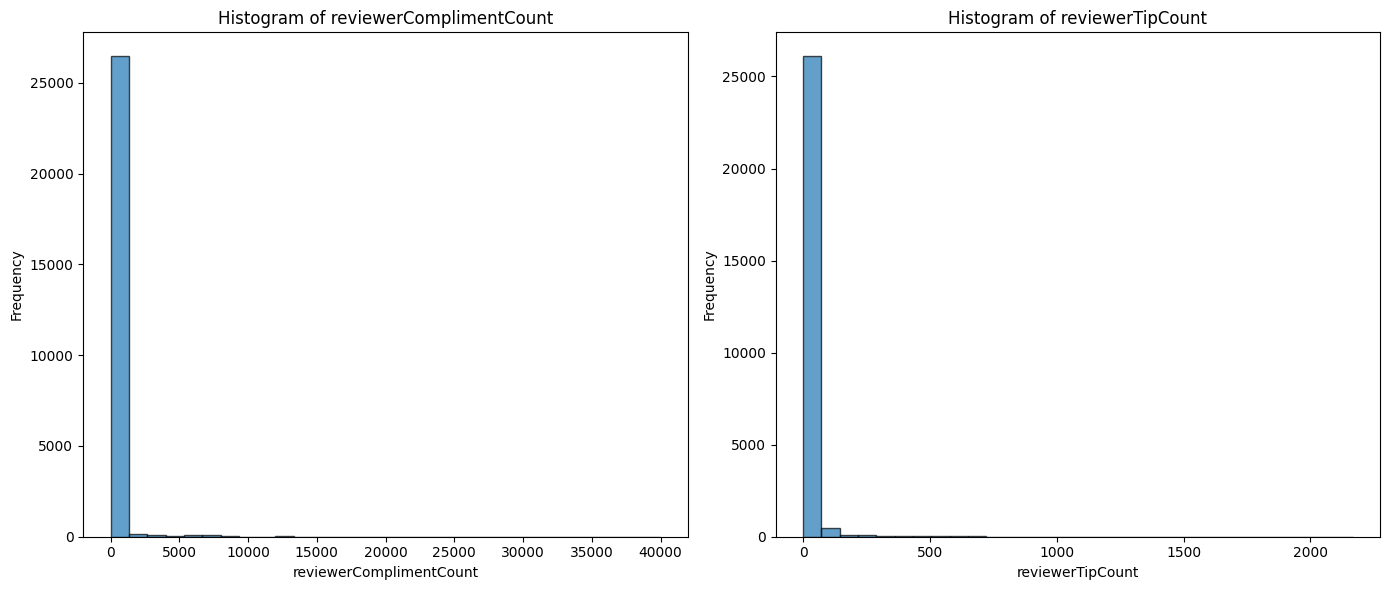

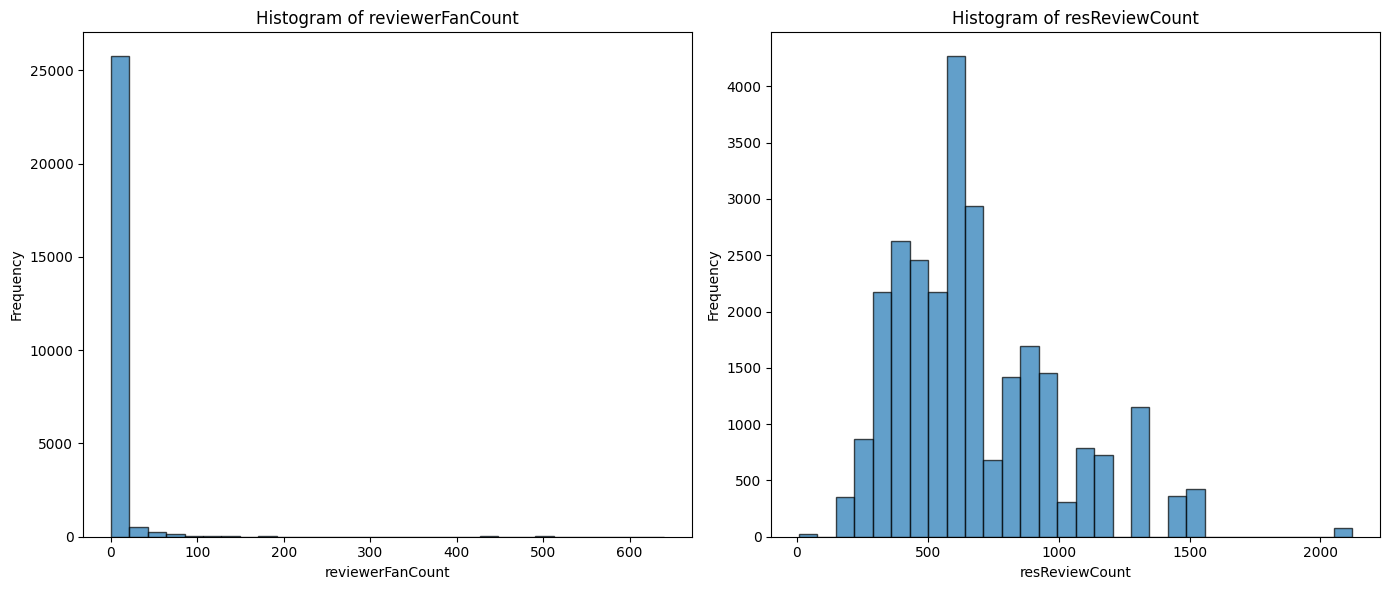

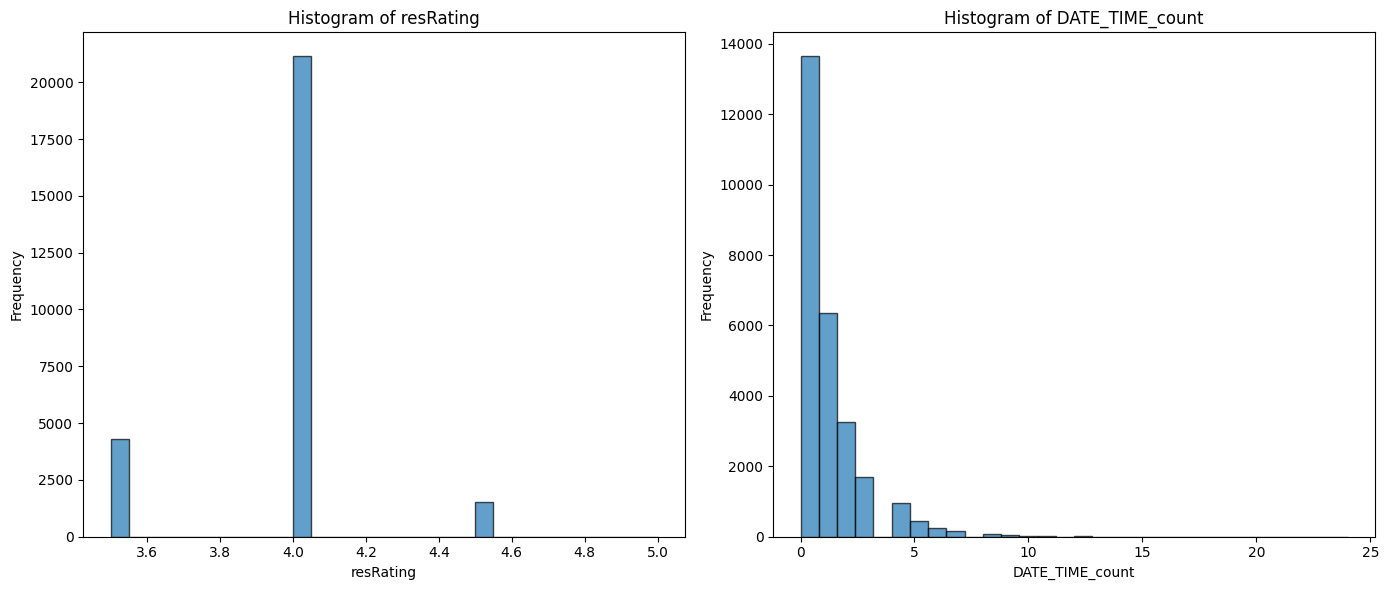

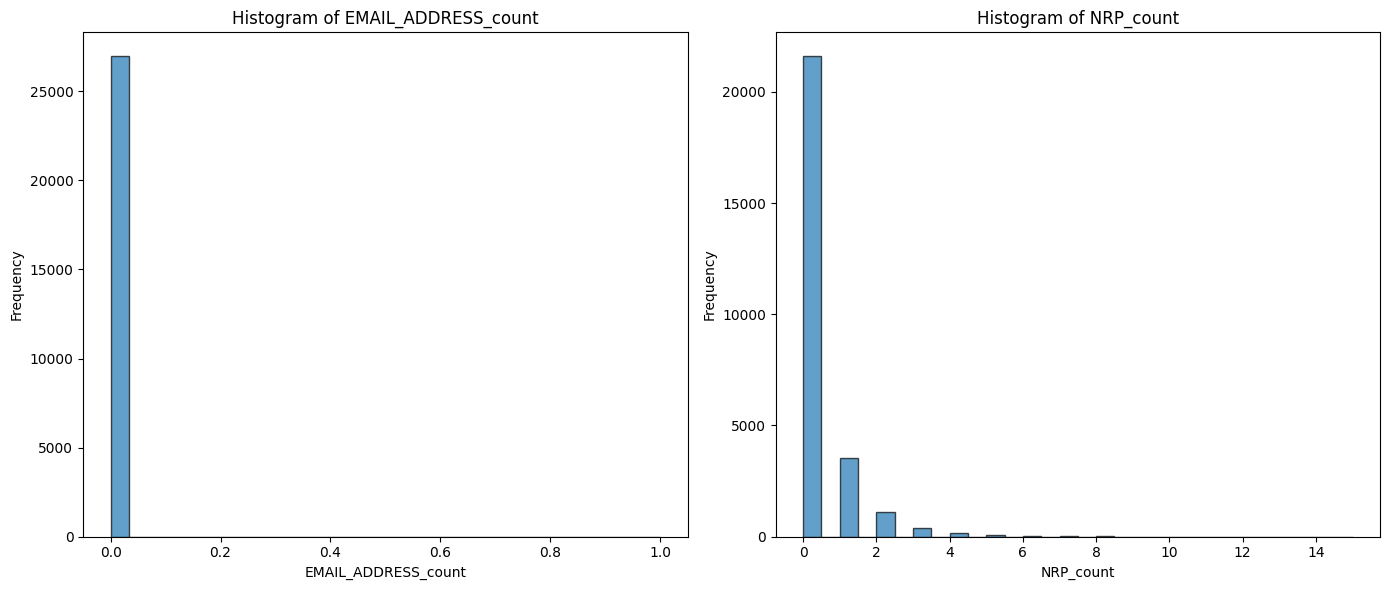

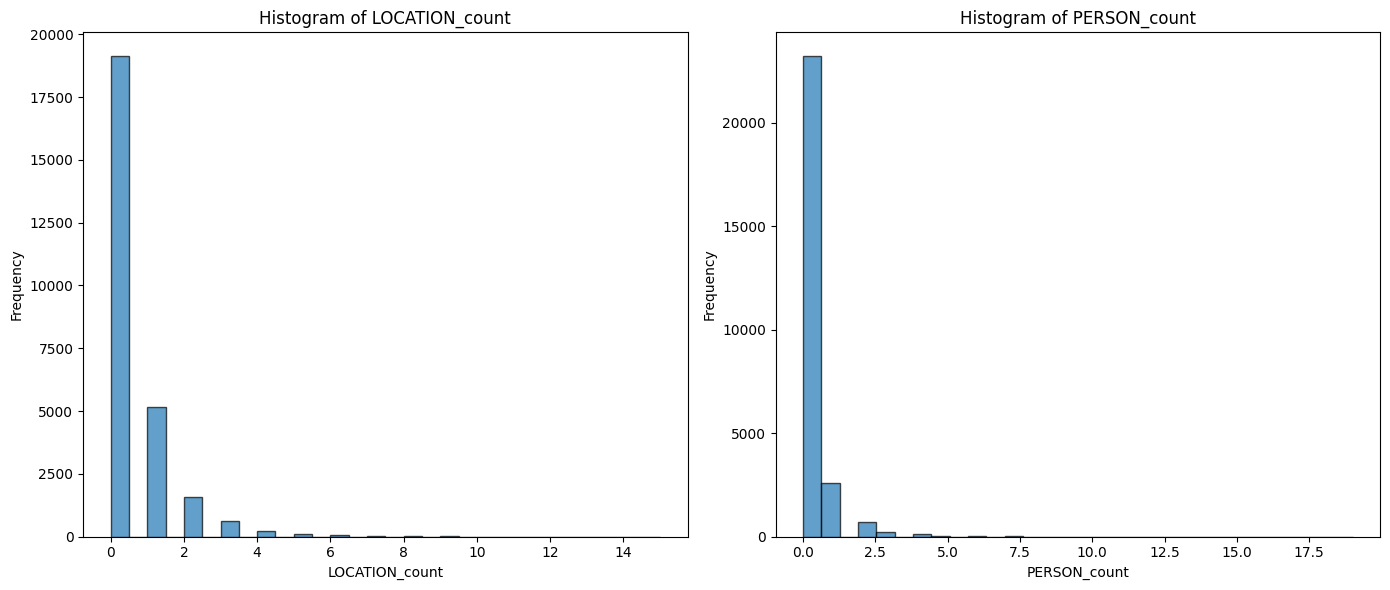

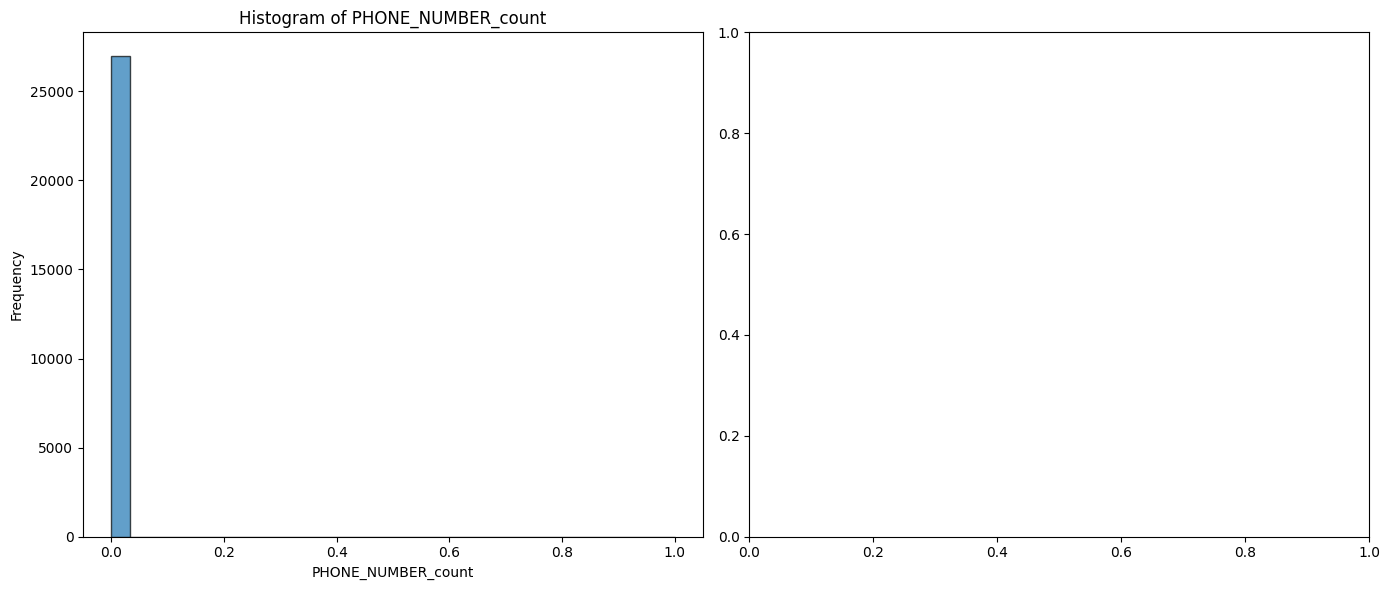

In [21]:
# Plotting histograms in pairs
for i in range(0, len(numerical_columns), 2):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot first histogram (if exists)
    if i < len(numerical_columns):
        df[numerical_columns[i]].hist(bins=30, edgecolor='black', alpha=0.7, ax=ax[0])
        ax[0].set_title(f'Histogram of {numerical_columns[i]}')
        ax[0].set_xlabel(numerical_columns[i])
        ax[0].set_ylabel('Frequency')
        ax[0].grid(False)
    
    # Plot second histogram (if exists)
    if i+1 < len(numerical_columns):
        df[numerical_columns[i+1]].hist(bins=30, edgecolor='black', alpha=0.7, ax=ax[1])
        ax[1].set_title(f'Histogram of {numerical_columns[i+1]}')
        ax[1].set_xlabel(numerical_columns[i+1])
        ax[1].set_ylabel('Frequency')
        ax[1].grid(False)
    
    plt.tight_layout()
    plt.show()

/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_9144/482171579.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]=="Y"][column], shade=True, color="red", label="Fraud", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_9144/482171579.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]=="N"][column], shade=True, color="green", label="Genuine", ax=ax)
/var/folders/1t/nll74_0j61918pgb1cz1kwsr0000gn/T/ipykernel_9144/482171579.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["flagged"]=="Y"][column], shade=True, color="red", label="Fraud", ax=ax)
/var/f

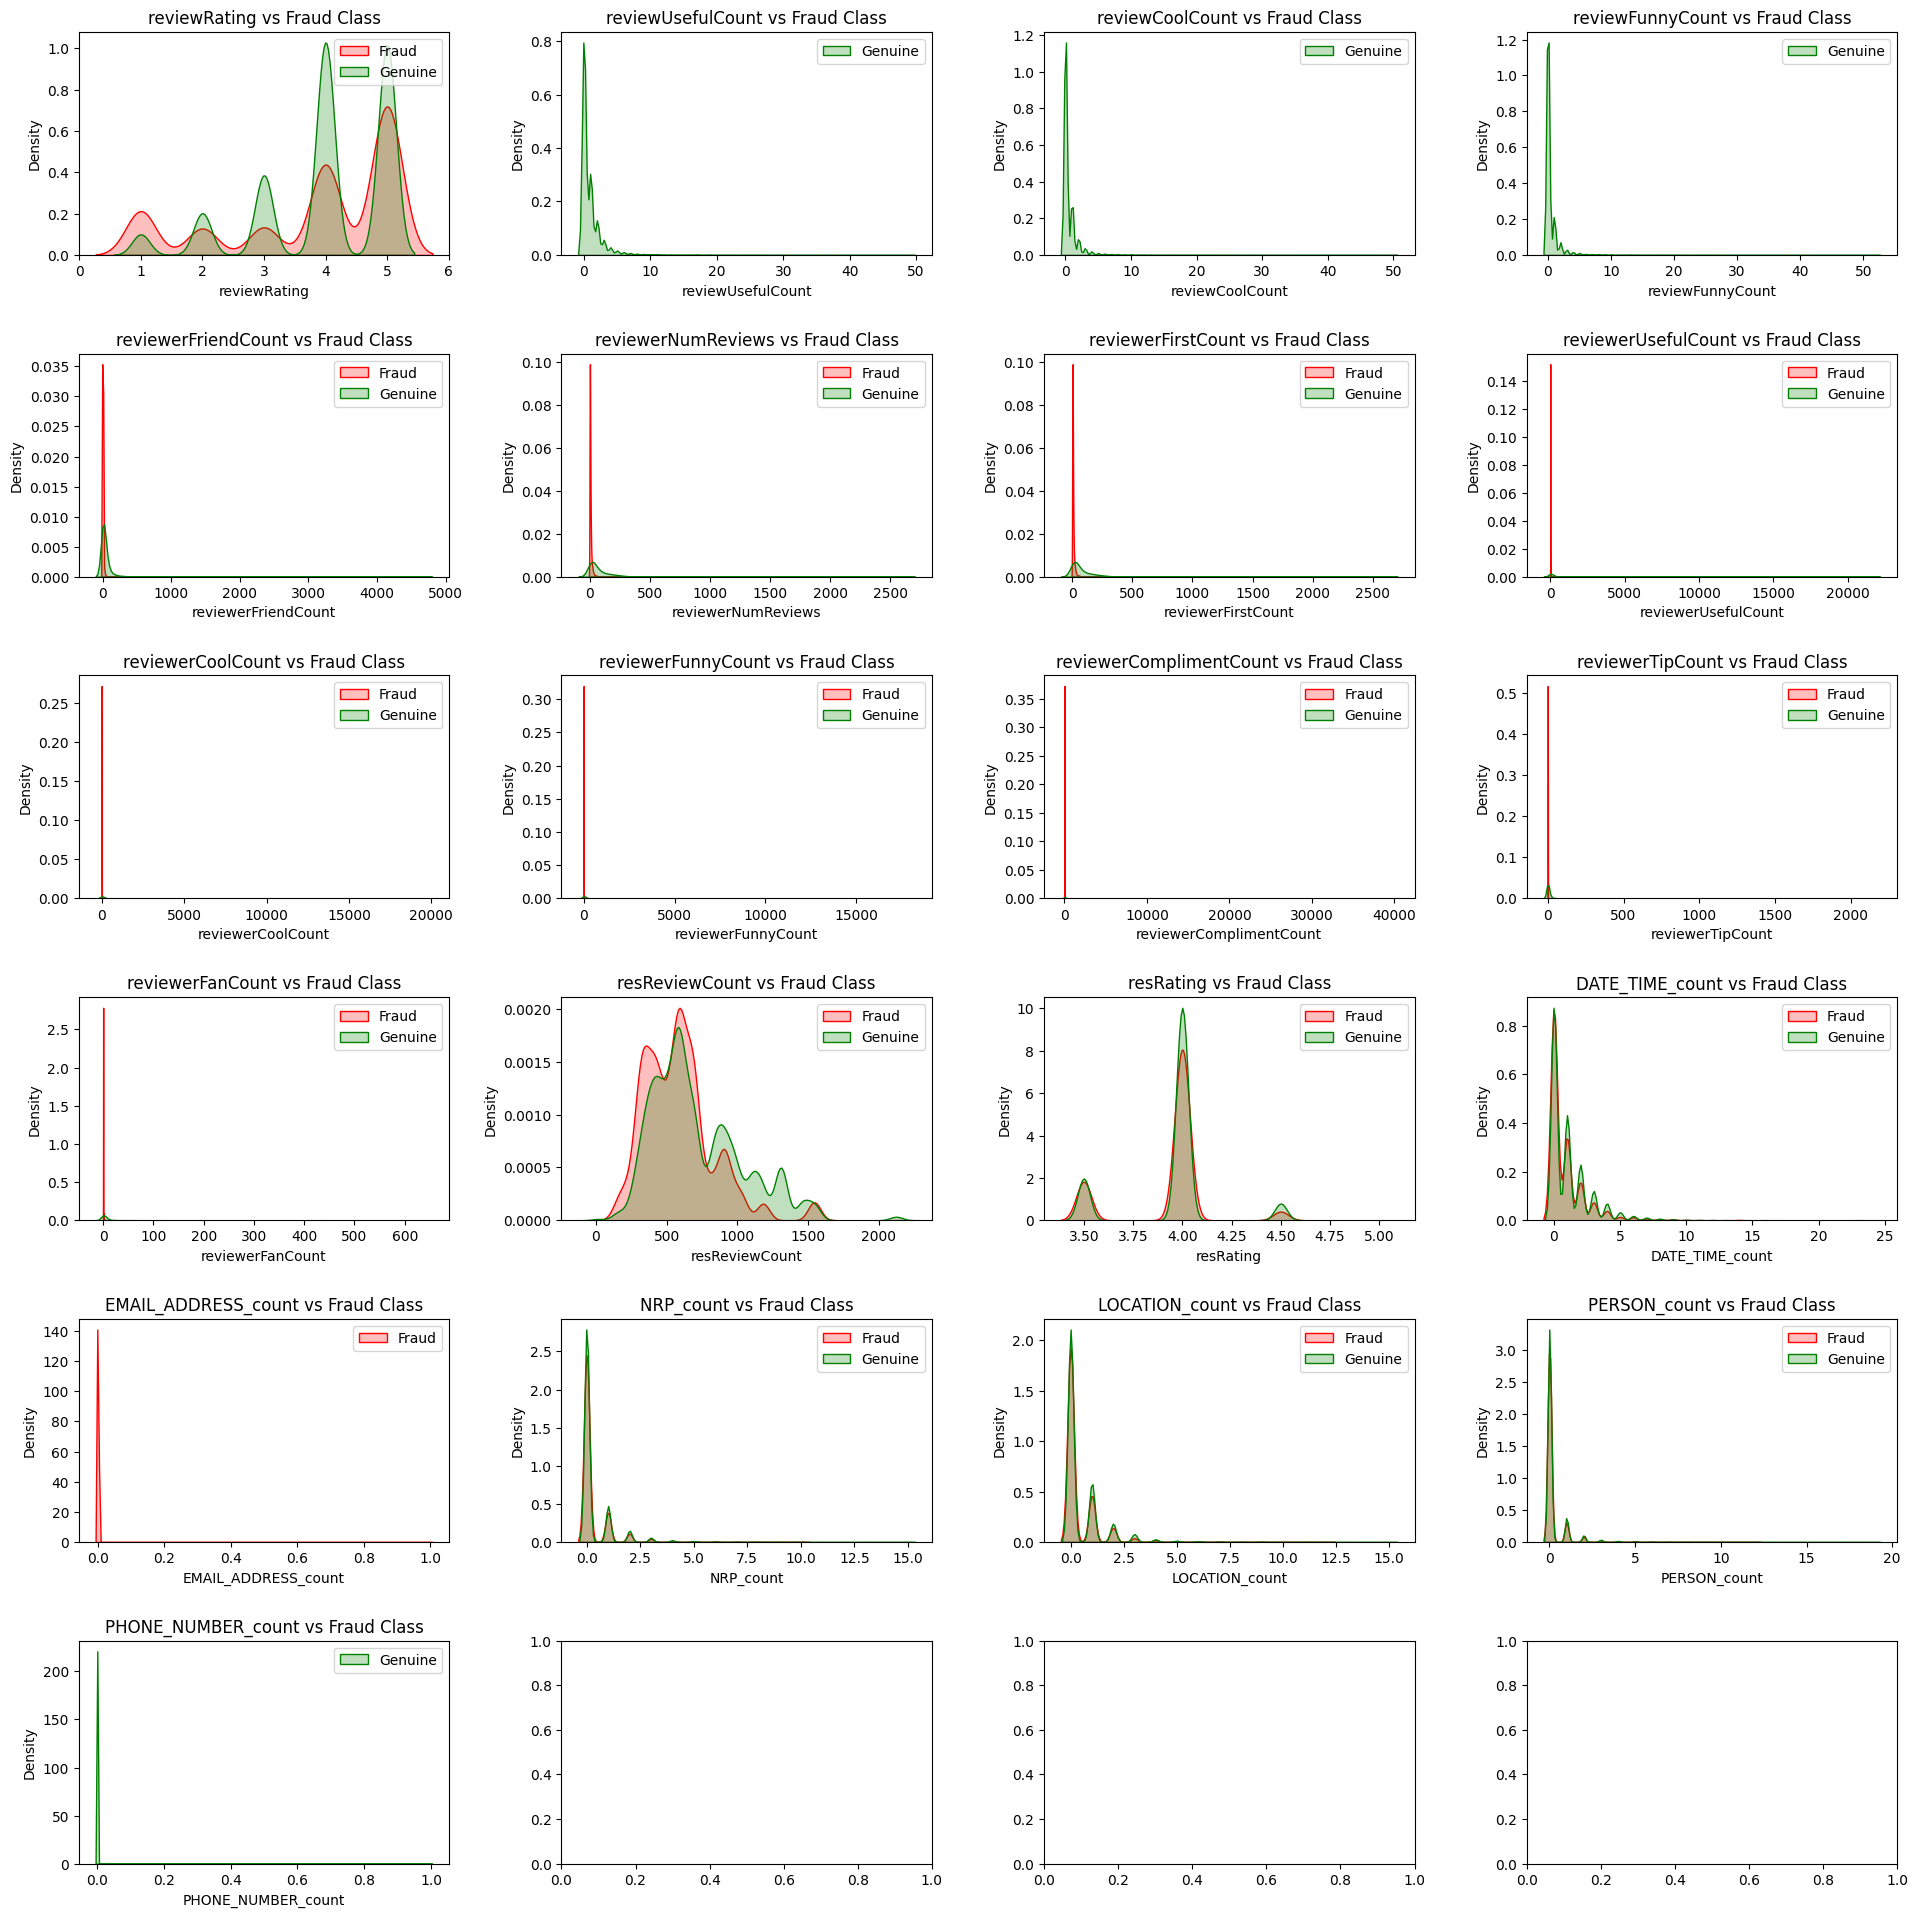

In [27]:
import seaborn as sns
# Define rows and columns for the subplots
n_rows = 6
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
fig.tight_layout(pad=5)

for ax, column in zip(axes.ravel(), numerical_columns):
    sns.kdeplot(df[df["flagged"]=="Y"][column], shade=True, color="red", label="Fraud", ax=ax)
    sns.kdeplot(df[df["flagged"]=="N"][column], shade=True, color="green", label="Genuine", ax=ax)
    ax.set_title(column + " vs Fraud Class")
    ax.set_ylabel("Density")
    ax.legend()

plt.show()